In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('loan_data.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [3]:
data

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

interval columns not set, guessing: ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']


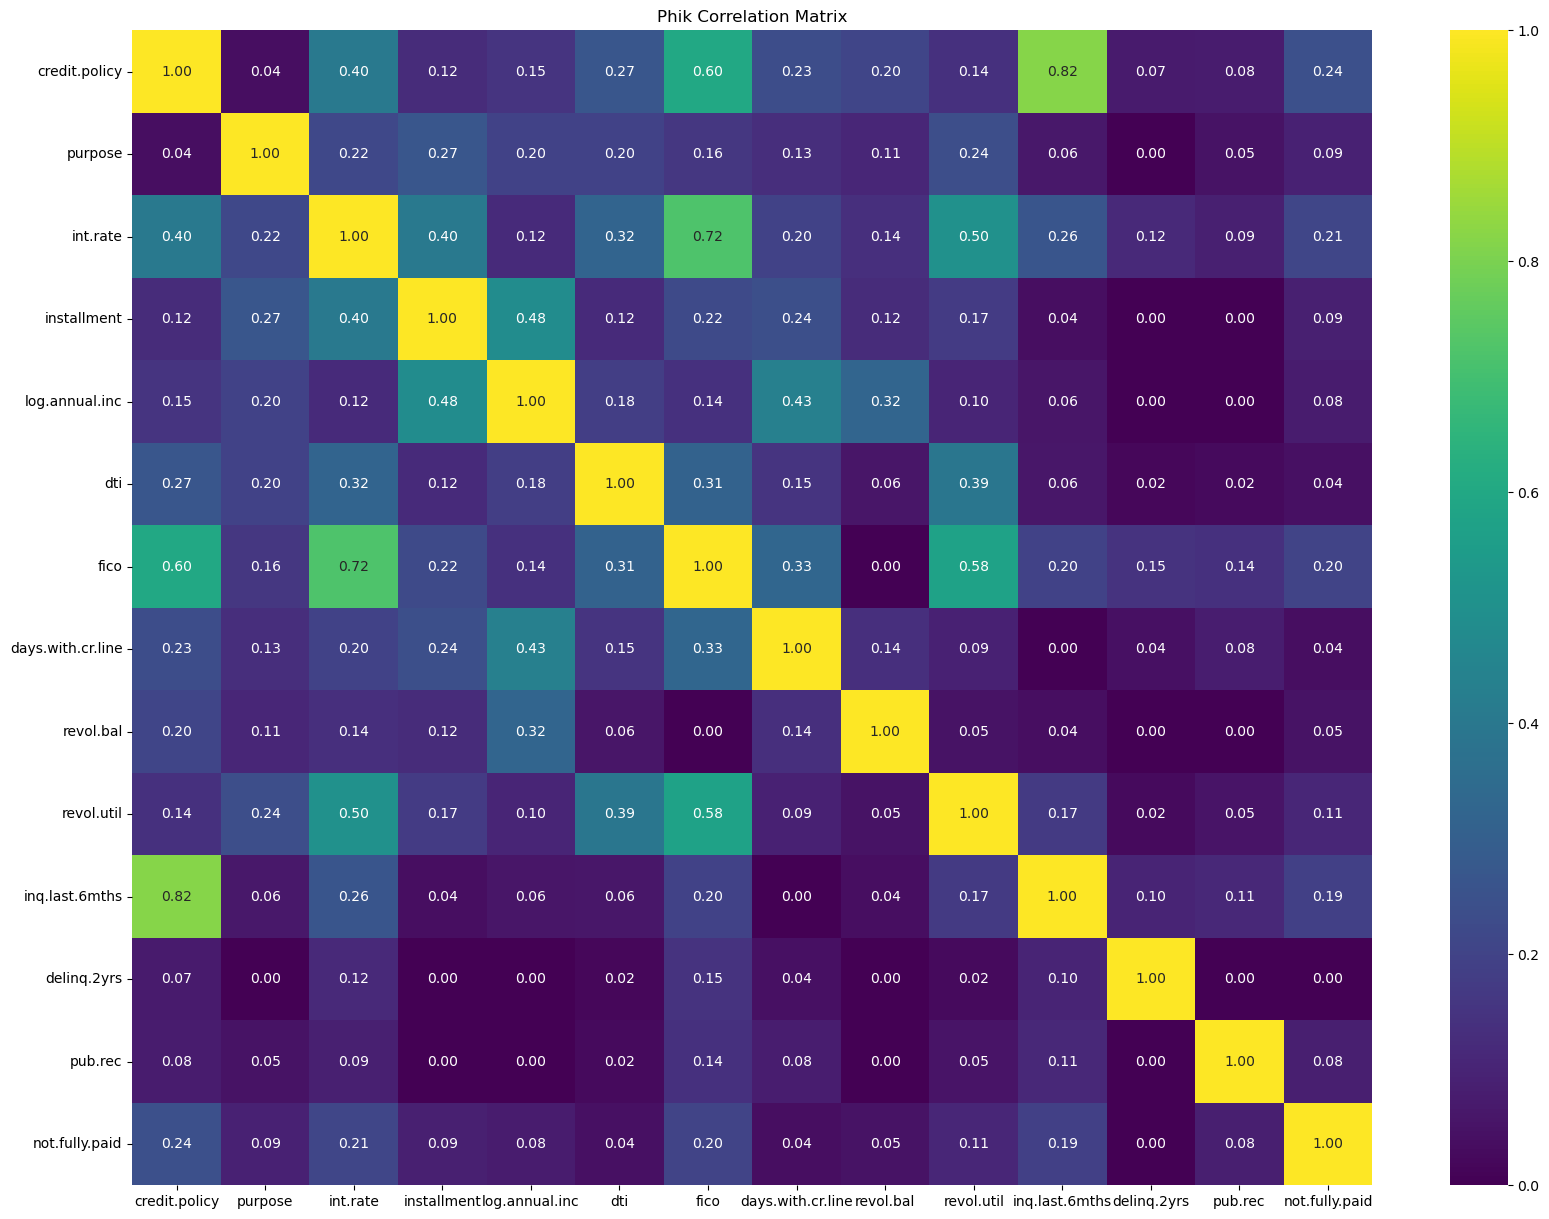

In [4]:
import phik
import seaborn as sns
import matplotlib.pyplot as plt
from phik import resources, report

phik_matrix = data.phik_matrix()

plt.figure(figsize=(20, 15))

sns.heatmap(phik_matrix, annot=True, cmap='viridis', fmt=".2f")

plt.title('Phik Correlation Matrix')

plt.show()

In [6]:
from ydata_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
purpose_dummies = pd.get_dummies(data['purpose'], prefix='purpose')
data = pd.concat([data, purpose_dummies], axis=1)
data.drop('purpose', axis=1, inplace=True)

In [6]:
data

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  purpose_all_other  purpose_credit_card  \
0           0               0                  0                    0   
1           0               0                  0                    1   
2           0               0                  0                    0   
3           0               0                  0                    0   
4           0               0                  0                    1   
...       ...             ...                ...                  ...   
9573        0               1                  1                    0   
9574        0               1                  1                    0   
9575        0               1                  0                    0   
9576        0               1                  0                    0   
9577        0               1                  0                    0   

      purpose_debt_consolidation  purpose_educational  \
0                              1                    0   
1                              0                    0   
2                              1                    0   
3                              1                    0   
4                              0                    0   
...                          ...                  ...   
9573                           0                    0   
9574                           0                    0   
9575                           1                    0   
9576                           0                    0   
9577                           1                    0   

      purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                            0                       0                       0  
1                            0                       0                       0  
2                            0                       0                       0  
3                            0                       0                       0  
4                            0                       0                       0  
...                        ...                     ...                     ...  
9573                       

In [7]:
cont = ['installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[cont] = scaler.fit_transform(data[cont])

In [9]:
data

credit.policy  int.rate  installment  log.annual.inc       dti  \
0                 1    0.1189     2.463099        0.680388  0.998505   
1                 1    0.1071    -0.438854        0.244031  0.244540   
2                 1    0.1357     0.230708       -0.908659 -0.141885   
3                 1    0.1008    -0.757022        0.680388 -0.654697   
4                 1    0.1426    -1.043992        0.597961  0.343326   
...             ...       ...          ...             ...       ...   
9573              0    0.1461     0.123976        2.031030 -0.322023   
9574              0    0.1253    -0.296481        0.341170 -1.800898   
9575              0    0.1071    -1.068670       -0.545694  0.070213   
9576              0    0.1600     0.156914       -0.182730  0.954924   
9577              0    0.1392     2.580601        0.540594  0.533633   

          fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0     0.688825           0.432230   0.353732    0.182704               0   
1    -0.101303          -0.721230   0.495018    1.030602               0   
2    -0.759742           0.059770  -0.397073   -0.730683               1   
3     0.030385          -0.745277   0.496321    0.909966               1   
4    -1.154806          -0.198161  -0.360663   -0.251586               0   
...        ...                ...        ...         ...             ...   
9573 -1.023118           2.368325   5.879467    1.216726               2   
9574  0.293761          -0.072400  -0.495638   -1.575135               5   
9575 -0.628054          -0.444860  -0.203765    1.244300               8   
9576 -0.496366          -1.105722  -0.501089   -1.502753               5   
9577  0.557137           0.071785   0.621105    0.351594               6   

      delinq.2yrs  pub.rec  not.fully.paid  purpose_all_other  \
0               0        0               0                  0   
1               0        0               0                  0   
2               0        0               0                  0   
3               0        0               0                  0   
4               1        0               0                  0   
...           ...      ...             ...                ...   
9573            0        0               1                  1   
9574            0        0               1                  1   
9575            0        0               1                  0   
9576            0        0               1                  0   
9577            0        0               1                  0   

      purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                       0                           1                    0   
1                       1                           0                    0   
2                       0                           1                    0   
3                       0                           1                    0   
4                       1                           0                    0   
...                   ...                         ...                  ...   
9573                    0                           0                    0   
9574                    0                           0                    0   
9575                    0                           1                    0   
9576                    0                           0                    0   
9577                    0                           1                    0   

      purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                            0                       0                       0  
1                            0                       0                       0  
2                            0                       0                       0  
3                            0                       0                       0  
4                            0                       0                       0  
...                     

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('not.fully.paid',axis=1)
y = data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.58      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.47      2874
weighted avg       0.81      0.85      0.78      2874



In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [70, 120, 150],  # Number of trees in the random forest
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 5, 7]     # Minimum number of samples required at each leaf node
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# View the best parameters from fitting the grid search
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, predictions))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.01      0.01       443

    accuracy                           0.85      2874
   macro avg       0.72      0.50      0.46      2874
weighted avg       0.81      0.85      0.78      2874

[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.1s
[CV] END min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   4.3s
[CV] END min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.1s
[CV] END min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
[C

In [33]:
best_model

RandomForestClassifier(min_samples_leaf=7, n_estimators=150)

In [34]:
import pickle
with open('loan.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [35]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)